#1 Realiza un scraping a una web de Talentos, Empresas o Vacantes. Con el fin de obtener un set de datos. (Lenguaje de programación de tu preferencia.).


La función main es un web scraper que recolecta información sobre ofertas de trabajo en varios departamentos de Colombia de la página web https://co.computrabajo.com.

La función realiza lo siguiente:

* Construye una URL a partir del nombre del departamento y realiza una solicitud GET a esa URL.
* Extrae una lista de URLs de categorías de ofertas de trabajo del HTML de la respuesta.
* Itera sobre las URLs de categorías y realiza solicitudes GET a cada una de ellas.
* Calcula el número de páginas de ofertas de trabajo en la categoría a partir del número total de ofertas de trabajo en la categoría.
* Itera sobre el número de páginas y realiza solicitudes GET a cada una de ellas.
* Extrae las URLs de cada oferta de trabajo de la página y realiza solicitudes GET a cada una de ellas.
* Extrae el título, las etiquetas y el contenido HTML de cada oferta de trabajo y los almacena en un diccionario.
* Agrega el diccionario a una lista llamada data.
* Convierte la lista data a un dataframe de Pandas y lo guarda en un archivo CSV llamado ofertas.csv.

## Mejoras posibles
1. Hacer que la función continué iterando desde el departamento, categoría y página donde haya fallado la conexión



### Importación de las librerias

In [96]:
import requests
import csv
from lxml import html
import pandas as pd
import math
import time
import os
import re


def remove_newlines_spaces(text):
  # Replace all \n and \r characters with an empty string
  return text.replace('\n', '').replace('\r', '').replace('\s', '')


## Segunda Versión de la función de scrapping (sin terminar)

In [97]:
first_iteration=True
indiceCategory=""
pagination=""
depart=""

def main(i,g,departament):
    global first_iteration,indiceCategory,pagination,depart
    depart=departament
    url = "https://co.computrabajo.com/empleos-en-"+str(departament)
    payload={}
    headers = {"Connection":"keep-alive","Accept-Encoding":"gzip, deflate, br","Accept":"/","User-Agent":"PostmanRuntime/8.30.0"}
    response = requests.request("GET", url, headers=headers, data=payload)
    tree = html.fromstring(response.content)
    categories=tree.xpath('//ul[@data-id="publicationtime"]/following::a//@href')
    for c in range(i,len(categories)): 
        try:
          indiceCategory=c
          category=categories[c]
          urlCategory="https://co.computrabajo.com"+category
          payloadCategory={}
          headersCategory = {"Connection":"keep-alive","Accept-Encoding":"gzip, deflate, br","Accept":"/","User-Agent":"PostmanRuntime/7.30.0"}
          responseCategory = requests.request("GET", urlCategory, headers=headersCategory, data=payloadCategory)
          treeCategory = html.fromstring(responseCategory.content)
          nofferts=treeCategory.xpath('//span[@class="fwB mr5"]//text()')
          p=math.ceil(int(remove_newlines_spaces(nofferts[0]))/20)
          for a in range(g,p):
            try:
              pagination=a
              urlCategory="https://co.computrabajo.com"+category+"?p="+str(a)
              payloadCategory={}
              headersCategory = {"Connection":"keep-alive","Accept-Encoding":"gzip, deflate, br","Accept":"/","User-Agent":"PostmanRuntime/7.30.0"}
              responseCategory = requests.request("GET", urlCategory, headers=headersCategory, data=payloadCategory)
              treeCategory = html.fromstring(responseCategory.content)
              offerts = treeCategory.xpath('//a[@class="js-o-link fc_base"]//@href')
              for offert in offerts:
                  urlOffert="https://co.computrabajo.com"+offert
                  #print(urlOffert)
                  payloadOffert={}
                  headersOffert = {"Connection":"keep-alive","Accept-Encoding":"gzip, deflate, br","Accept":"/","User-Agent":"PostmanRuntime/7.30.0"}
                  responseOffert = requests.request("GET", urlOffert, headers=headersOffert, data=payloadOffert)
                  treeOffert = html.fromstring(responseOffert.content)
                  tittleOfferts = treeOffert.xpath('//h1[@class="fwB fs24 mb5 box_detail w100_m"]/text()')
                  tagsOfferts=treeOffert.xpath('//span[@class="tag base mb10"]//text()')
                  htmlOffer=treeOffert.xpath('//div[@div-link="oferta"]//text()')
                  #print(offert)
                  '''
                  print(tittleOfferts)
                  print(tagsOfferts)
                  print(htmlOffer)
                  #break
                  '''
                  data={
                      'departament': [departament],
                      'category': [urlCategory],   
                      'url': [urlOffert],
                      'title': [' '.join(tittleOfferts)],
                      'tags': [' '.join(tagsOfferts)],
                      'html': [' '.join(htmlOffer)]
                      }
                  time.sleep(1)
                  if (first_iteration and os.path.exists('/content/ofertas1.csv')):
                    df0 = pd.read_csv('/content/ofertas1.csv', sep=";")
                    first_iteration = False
                  else: 
                    df0 = df
                  
                  df = df0.append(data, ignore_index=True)  
                  df.to_csv("ofertas1.csv",sep=";")
                  print('c:'+ categories[c] ,'página a:'+str(a)+ ' departamento: '+ str(departament), offert)
            except Exception as e:
              time.sleep(1)
              print(e)
              print(indiceCategory,pagination,depart)
              main(c,a,departament)
        except Exception as e:
          main(c,0,departament)



# Initialize an empty dataframe to store the results
deptos=['cordoba', 'cesar', 'narino', 'cauca', 'magdalena', 'huila', 'quindio', 'boyaca', 'norte-de-santander', 'tolima', 'meta', 'caldas', 'bolivar', 'risaralda', 'atlantico', 'santander', 'cundinamarca', 'valle-del-cauca', 'antioquia', 'bogota-dc']
depart

for depto in deptos:
        df = main(0,1,depto)
        results = results.append(df)

'''
if (os.path.exists('/content/ofertas1.csv')):
  for depto in deptos:
          depart=depto
          df = main(indiceCategory,pagination,depart)
else
'''


c:/empleos-de-marketing-y-ventas-en-cordoba página a:1 departamento: cordoba /ofertas-de-trabajo/oferta-de-trabajo-de-ejecutivo-de-ventas-externo-para-empresas-indispensable-tener-moto-con-papeles-al-dia-experiencia-en-el-cargo-a-partir-de-un-ano-en-monteria-3BDBDF6A1F714B6C61373E686DCF3405#lc=ListOffers-Score-0
c:/empleos-de-marketing-y-ventas-en-cordoba página a:1 departamento: cordoba /ofertas-de-trabajo/oferta-de-trabajo-de-transferencista-sector-farmaceutico-en-monteria-8C09BF5CC2B8F5D861373E686DCF3405#lc=ListOffers-Score-1


KeyboardInterrupt: ignored

In [7]:
print(indiceCategory)
print(pagination)
print(depart)

23
3
cordoba


## Función inical sin tener en cuenta el número de páginas por categoría ni las categorías de la oferta 

La categoría es importante para obtener la clasificación de las ofertas en sector económico, dicha información no se encuentra en la oferta y es necesario extraerlo de la URL



In [21]:
import requests
import pandas as pd
from lxml import html
import re

# Create an empty list to store the data
data = []

def main(p,departament):
    if(p>1):
        url = "https://co.computrabajo.com/empleos-en-"+str(departament)+"?p="+str(p)
    else:   
        url = "https://co.computrabajo.com/empleos-en-"+str(departament)
    payload={}
    headers = {"Connection":"keep-alive","Accept-Encoding":"gzip, deflate, br","Accept":"*/*","User-Agent":"PostmanRuntime/7.30.0"}
    response = requests.request("GET", url, headers=headers, data=payload)
    tree = html.fromstring(response.content)
    offerts = tree.xpath('//a[@class="js-o-link fc_base"]//@href')
    nofferts=tree.xpath('//span[@class="fwB mr5"]//text()')
    categories=tree.xpath('//ul[@data-id="idcategory"]//text()')    
    
    for offert in offerts:
        urlOffert="https://co.computrabajo.com"+offert
        payloadOffert={}
        headersOffert = {"Connection":"keep-alive","Accept-Encoding":"gzip, deflate, br","Accept":"*/*","User-Agent":"PostmanRuntime/7.30.0"}
        responseOffert = requests.request("GET", urlOffert, headers=headersOffert, data=payloadOffert)
        treeOffert = html.fromstring(responseOffert.content)
        tittleOfferts = treeOffert.xpath('//h1[@class="fwB fs24 mb5 box_detail w100_m"]/text()')
        tagsOfferts=treeOffert.xpath('//span[@class="tag base mb10"]//text()')
        htmlOffer=treeOffert.xpath('//div[@div-link="oferta"]//text()')
        
        # Append the data to the list
        data.append({
            'department': departament, 
            'url': urlOffert,
            'title': ' '.join(tittleOfferts),
            'tags': ' '.join(tagsOfferts),
            'html': ' '.join(htmlOffer)
        })
        
    # Create a dataframe from the list of dictionaries
    df = pd.DataFrame(data)
    
    return df

# Initialize an empty dataframe to store the results
results = pd.DataFrame()

# Scrape the first 20 pages for the "cesar" department


deptos=['cordoba', 'cesar', 'narino', 'cauca', 'magdalena', 'huila', 'quindio', 'boyaca', 'norte-de-santander', 'tolima', 'meta', 'caldas', 'bolivar', 'risaralda', 'atlantico', 'santander', 'cundinamarca', 'valle-del-cauca', 'antioquia', 'bogota-dc']

for depto in deptos:
  for x in range(1,17):  
        df = main(x,depto)
        results = results.append(df)
results


#results.to_excel('offerts.xlsx', index=False)

,department,url,title,tags,html
0,cordoba,https://co.computrabajo.com/ofertas-de-trabajo...,ejecutivo de ventas externo para empresas indi...,"$ 1.000.000,00 (Mensual) Contrato de Obra o la...",\r\n Descripción de la oferta \r\n \r\...
1,cordoba,https://co.computrabajo.com/ofertas-de-trabajo...,Vendedor Junior - Leer oferta,"$ 2.000.000,00 (Mensual) Contrato de Obra o la...",\r\n Descripción de la oferta \r\n \r\...
2,cordoba,https://co.computrabajo.com/ofertas-de-trabajo...,Transferencista - sector farmacéutico,"$ 2.200.000,00 (Mensual) Contrato de Obra o la...",\r\n Descripción de la oferta \r\n \r\...
3,cordoba,https://co.computrabajo.com/ofertas-de-trabajo...,conductor/a Entregador - Montería,Contrato de Obra o labor Tiempo Parcial,\r\n Descripción de la oferta \r\n \r\...
4,cordoba,https://co.computrabajo.com/ofertas-de-trabajo...,Analista de Microcrédito,"$ 1.177.400,00 (Mensual) Contrato de Obra o la...",\r\n Descripción de la oferta \r\n \r\...
...,...,...,...,...,...
6395,bogota-dc,https://co.computrabajo.com/ofertas-de-trabajo...,Soldador Metalmecánico,"$ 2.500.000,00 (Mensual) Contrato de Obra o la...",\r\n Descripción de la oferta \r\n \r\...
6396,bogota-dc,https://co.computrabajo.com/ofertas-de-trabajo...,Fullstack Software Engineer Specialist,Contrato a término indefinido Tiempo Completo ...,\r\n Descripción de la oferta \r\n \r\...
6397,bogota-dc,https://co.computrabajo.com/ofertas-de-trabajo...,mercaderista - Urgente// Bogotá,Contrato de Obra o labor Tiempo Completo,\r\n Descripción de la oferta \r\n \r\...
6398,bogota-dc,https://co.computrabajo.com/ofertas-de-trabajo...,Auxiliar de farmacia hospitalario,"$ 1.500.000,00 (Mensual) Contrato de Obra o la...",\r\n Descripción de la oferta \r\n \r\...


In [98]:
#results=pd.read_excel('/content/offerts.xlsx')

results=results.drop_duplicates(keep='first')
results.shape

results['department'].value_counts()

results.to_excel('offerts.xlsx', index=False)
results

results.dtypes

department    object
url           object
title         object
tags          object
html          object
dtype: object

## Se crean variables de interes a partir de expresiones regulares

1. Palabras Clave de la oferta 
2. Elimina los textos del final de las ofertas
3. Obtener los requerimientos de la oferta
4. Eliminación de palabras vacías del cuerpo de la oferta
5. Valor del contrato
6. Tipo de contrato
7. Palabras escritas con mayúsculas (aquellas en las que se hace enfásis en la oferta
8. Años de experiencia
9. Educación mínima requerida (pendiente mejorar)

## Eliminar palabras vacías

In [99]:
def remove_newlines(text):
  if not isinstance(text, str):
    text = str(text)
  # Replace all \n and \r characters with an empty string
  return text.replace('\n', '').replace('\r', '')

results['html'] = results['html'].apply(remove_newlines)

def eliminar_texto(texto):
  # Utiliza una expresión regular para eliminar el texto indeseado
  texto_filtrado = re.sub(r'Aplicar Avísame con ofertas similares Denunciar empleo Gracias por ayudarnos a mejorar Computrabajo Nos tomamos muy en serio tus comentarios y lo revisaremos lo antes posible\.', '', texto)
  return texto_filtrado

results['html'] = results['html'].apply(eliminar_texto)  # Aplica la función a cada fila de la columna

def obtener_palabras_clave(texto):
  # Utiliza una expresión regular para buscar todas las coincidencias del patrón en el texto
  match = re.search(r'Palabras clave: (.*?) Hace \d hora', texto)
  if match:
    return match.group(1)
  return ''

results['palabras_claves'] = results['html'].apply(obtener_palabras_clave)  # Aplica la función a cada fila de la columna
results['palabras_claves']

def obtener_requerimientos(texto):
  # Utiliza una expresión regular para buscar todas las coincidencias del patrón en el texto
  match = re.search(r'Requerimientos (.*?) Palabras clave:', texto)
  if match:
    return match.group(1)
  return ''


results['requerimientos'] = results['html'].apply(obtener_requerimientos)  # Aplica la función a cada fila de la columna
results['requerimientos']

0                             Educación mínima: Univer...
1                             Educación mínima: Univer...
2                             Educación mínima: Univer...
3                             Educación mínima: Bachil...
4                             Educación mínima: Univer...
                              ...                        
6395                          Educación mínima: Educac...
6396                          Educación mínima: Univer...
6397                          Educación mínima: Bachil...
6398                          Educación mínima: Univer...
6399                          Educación mínima: Univer...
Name: requerimientos, Length: 6400, dtype: object

In [101]:
import nltk
# Descarga la lista de palabras "stop" de nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Obtiene la lista de stopwords en inglés

stop_words = set(stopwords.words('spanish'))  
def quitar_stopwords(texto):
  palabras = texto.split()  # Divide el texto en una lista de palabras
  palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]  # Filtra las palabras "stop"
  return ' '.join(palabras_filtradas)  # Devuelve el texto sin las palabras "stop"

results['html_sin_stopwords'] = results['html'].apply(quitar_stopwords)  # Aplica la función a cada fila de la columna
results['title_sin_stopwords'] = results['title'].apply(quitar_stopwords)  # Aplica la función a cada fila de la columna



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: ignored

In [ ]:
results["valor_contrato"] = results["tags"].str.extract(r"\$ (\d+(?:[.,]\d{3})*(?:[.,]\d{2}))?")
results["tipo_contrato"] = results["tags"].str.extract(r"Contrato (\b(?:a término (?:fijo|indefinido)|de Obra o labor|civil por prestación de servicios)\b)")
#results["tipo_término"] = results["tags"].str.extract(r"(fijo|indefinido|obra|labor|prestación)")
results["palabras_mayúsculas"] = results["html"].str.findall(r"\b[A-Z]+\b")
#results["tags"] = results["tags"].str.lower()


In [ ]:

def obtener_anos_experiencia(texto):
  # Utiliza una expresión regular para buscar todas las coincidencias del patrón en el texto
  match =  re.search(r'(\d+) año[s]? de experiencia', texto)
  if match:
    return match.group(1)
  return ''

results['anos_experiencia'] = results['html'].apply(obtener_anos_experiencia)  # Aplica la función a cada fila de la columna




In [ ]:

def obtener_educacion_mínima(texto):
  # Utiliza una expresión regular para buscar todas las coincidencias del patrón en el texto
  match =  re.search(r'Educación mínima:(.*?)\d+ año[s]? de experiencia|Conocimientos|Licencias|estudiantes|Experiencia|Beneficios]', texto)
  if match:
    return match.group(1)
  return ''

results['educacion_minima'] = results['html'].apply(obtener_educacion_mínima)  # Aplica la función a cada fila de la columna


results['educacion_minima'] = results['educacion_minima'].str.replace('Menos de ', '')

results['educacion_minima'].value_counts()




## Crear la categoría económica de la oferta laboral

Puesto que ajustar la función para traer la categoría económica tomaba mucho tiempo se intentará crear a partir de una clasificación no supervisada del títuto de la oferta.

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans


In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans

# Cargar los datos de texto en un dataframe de pandas
df = results

# Limpiar y procesar los datos de texto
df['title_sin_stopwords'] = df['title_sin_stopwords'].str.lower() # Convertir a minúsculas
df['title_sin_stopwords'] = df['title_sin_stopwords'].str.replace(r'[^\w\s]','') # Eliminar símbolos
df['title_sin_stopwords'] = df['title_sin_stopwords'].apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(i) for i in x.split()])) # Convertir a forma raíz

# Convertir el texto en una matriz de términos
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['title_sin_stopwords'])

# Calcular la frecuencia inversa de términos y asignar un peso a cada término
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Crear una lista de números de clusters a evaluar
num_clusters = [2, 5, 10,11,12,13,14,15,20,50,100]

# Calcular la inercia para cada valor de clusters
inertias = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_tfidf)
    inertias.append(kmeans.inertia_)
               

#Dibujar un gráfico de la inercia en función del número de clusters
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

El criterio del codo no funciona, por lo cual habría que probar clasificación jerárquica o un método mixto  clasificación, 

Con fines ilustrativos, se emplearan 20 categorías

In [ ]:


# Limpiar y procesar los datos de texto
results['title_sin_stopwords'] = results['title_sin_stopwords'].astype(str)
results['title_sin_stopwords'] = results['title_sin_stopwords'].str.lower() # Convertir a minúsculas
results['title_sin_stopwords'] = results['title_sin_stopwords'].str.replace(r'[^\w\s]','') # Eliminar símbolos
results['title_sin_stopwords'] = results['title_sin_stopwords'].apply(lambda x: " ".join([WordNetLemmatizer().lemmatize(i) for i in x.split()])) # Convertir a forma raíz


# Convertir el texto en una matriz de términos
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(results['title_sin_stopwords'])

# Calcular la frecuencia inversa de términos y asignar un peso a cada término
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Crear el modelo de clasificación no supervisada
kmeans = KMeans(n_clusters=20)

# Entrenar el modelo con los datos de texto procesados
kmeans.fit(X_train_tfidf)

# Pruebe el modelo con nuevos datos de texto y verifique la precisión de la clasificación
#predictions = kmeans.predict(X_test_tfidf)
predictions = kmeans.predict(X_train_tfidf)

print(predictions)

results['class']=predictions
#results['class']=1

In [ ]:
from collections import Counter

# Supongamos que tenemos un DataFrame llamado "results" con las columnas "title" y "class"

# Creamos una función que recibe una cadena de texto y devuelve un diccionario con la frecuencia de cada palabra
def count_words(text):
    counter = Counter(text.split())
    return dict(counter)

# Aplicamos la función "count_words" a la columna "title" y almacenamos el resultado en una nueva columna llamada "word_counts"
results['word_counts'] = results['title_sin_stopwords'].apply(count_words)

# Agrupamos el DataFrame por la columna "class" y aplicamos la función "sum" a la columna "word_counts" para obtener la frecuencia total de cada palabra en cada clase
def sum_counters(counters):
    counter = Counter()
    for c in counters:
        counter += c
    return counter

counts = results.groupby(['class'])['word_counts'].apply(sum_counters).reset_index()

# Imprimimos el resultado
print(counts)
counts

In [ ]:
def sum_counters(counters):
    counter = Counter()
    for c in counters:
        counter += c
    most_common = counter.most_common(5)
    return ' '.join([word for word, count in most_common])


counts = results.groupby(['class'])['word_counts'].apply(sum_counters).reset_index()

counts =counts.rename(columns={'word_counts': 'nombre_clase'})

counts

In [ ]:
merged_df = counts.merge(results, on='class', how='right')
merged_df.to_excel("dataset_salida.xlsx")

#2 Almacena los datos anteriores en un modelo de datos local que posteriormente pueda ser consultado.

Las alternativas de modelos de datos evaluadas son
* Archivos JSON
* Base de datos en SQL
* **Dataframe**

Usamos la última por ser la estructura DataFrame de pandas, porque es una amplia gama de funciones para realizar operaciones con los datos, como agregar y eliminar filas y columnas, seleccionar y filtrar datos, calcular estadísticas y gráficos. Y aunque puede ser demandante en memoria, para el caso us suficiente.

# 3 Construye un reporte de análisis de los datos utilizando la herramienta de visualización de preferencia. Un Dashboard usando people analytics.

# 4 Carga el ejercicio a un repositorio de código.


# 5 Haz un análisis de las 10 Tendencias Top que encuentres en la data, buscando lograr la mayor probabilidad de exhibir ese contenido nuevo para que los usuarios le den clic.

## [El efecto tinder](https://www.lasexta.com/tecnologia-tecnoxplora/apps/estas-elite-tinder-esta-formula-saber-estas-mas-atractivos_2017091859c0335a0cf2784e05909ba5.html#!).

La élite de empresas y organizaciones pueden acarrear todas las aplicaciones de candidatos generando el efecto tinder

"Sólo un 20% de los usuarios varones de Tinder, guapos ellos, compiten entre sí por la atención del 78% de las féminas."

Es decir que la mayoría de las empresas "guapas" acaparan la atención de muchos talentos con perfiles "feos", pero con buen corazón.

Esto genera ansiedad en los candidatos que al igual que en tinder deslizan a la derecha y envían su perfil sin piedan para ver que cazan.

Esto genera que el tamizaje para las empresas sea dispendioso y requiera automatizarse.

Lo que puede recordar a la escena de la película una [mente brillante](https://youtu.be/63Y_rVLW-Tg), donde la mejor solución es no apuntar al empleo guapo y rubio y perder la oportunidad de tener un trabajo, menos sexy pero más lograble.

Por lo cual la recomendación sería ranquear las ofertas intercalando ofertas no tan buenas con ofertas excelentes, buscando que los candidatos apliquen primero a las que tengan más fáciles. Dando más peso a las ofertas con menos aplicaciones pero intercalando con otras para no generar la sensación de que no pueden lograr grandes empleos, solo generando mayor disponibilidad de las ofertas menos atractivas para no contribuir a la desigualdad en la aplicación, la saturación del proceso de selección y la ansiedad del candidato.

Esta información puede ser explicita para el aplicante, mencionando el número de competidores y el perfil promedio de los mismos, para que el candidato no se genere falsas expectativas y guarde su energía para los procesos donde realmente tenga oportunidad.

________________________________________
Pdta 1: Sería interesante hacer un análisis de la desigualdad en la aplicación de las ofertas, cuyo objetivo sea minimizar la tasa de aplicaciones y buscando aumentar la razón contrataciones/aplicaciones. 


_________________________________________________
Pdta 2:
Se pueden hacer estadísticas descriptivas para ver frecuencias de tipo de contrato, tiempo de experiencia, salarios promedio y crear noticias con "estos son las 5 ofertas a las que puedes aplicar sin experiencia..."


## Algo de ML: Arbol de decisión 

Los árboles de decisión tienen múltiples ventajas, como son.

Fáciles de interpretar, crean reglas de negocio y de poco tiempo de procesamiento

In [ ]:
from sklearn import tree

# Eliminamos los registros con valores nulos en la columna 'valor_contrato'
 
results = results.dropna(subset=['valor_contrato'])

def to_numeric(val):
        return float(re.sub(',', '.', re.sub('[^0-9,]', '', val)))

#results['valor_contrato'] = results['valor_contrato'].apply(to_numeric)
#results['valor_contrato'] = results['valor_contrato'].fillna(0)
results['valor_contrato'] = pd.to_numeric(results['valor_contrato'], errors='coerce')
results['anos_experiencia'] = results['anos_experiencia'].fillna(0)
results['anos_experiencia'] = pd.to_numeric(results['anos_experiencia'], errors='coerce')
results.dtypes



#Creamos una lista con los nombres de las columnas que queremos utilizar para entrenar el modelo
features = ['tipo_contrato', 
            #'palabras_mayúsculas',
            'anos_experiencia', 'educacion_minima']



#Asignamos los valores de las columnas seleccionadas a la variable X
X = results[features]
X[['tipo_contrato', 'educacion_minima']] = X[['tipo_contrato', 'educacion_minima']].astype(str)

X = pd.get_dummies(X, columns=['tipo_contrato','educacion_minima'])
#Asignamos los valores de la columna 'valor_contrato' a la variable y
y = results['valor_contrato']

#Creamos el modelo de árbol de decisión y lo entrenamos con nuestros datos
model = tree.DecisionTreeRegressor()
model.fit(X, y)

#Realizamos predicciones utilizando el modelo entrenado
predictions = model.predict(X)

#Imprimimos las predicciones para verificar su precisión
print(predictions) 

0       0.0
1       0.0
2       0.0
4       0.0
5       0.0
       ... 
6393    0.0
6394    0.0
6395    0.0
6398    0.0
6399    0.0
Name: valor_contrato, Length: 4874, dtype: float64

In [ ]:
list(X.columns)

['anos_experiencia',
 'tipo_contrato_a término fijo',
 'tipo_contrato_a término indefinido',
 'tipo_contrato_civil por prestación de servicios',
 'tipo_contrato_de Obra o labor',
 'tipo_contrato_nan',
 'educacion_minima_',
 'educacion_minima_ Bachiller Académico  Experiencia: Mínimo 6 meses en consumo masivo, principalmente experiencia en cuartos fríos, ventas, mercadeo y ruta.  Salario: $1.000.000+ prestaciones legales + variable garantizada los dos primeros meses de $271.000. Horario: Domingo a Domingo 8 horas, apertura o cierre con un día compensatorio en la semana.          Requerimientos                       Educación mínima: Bachillerato / Educación Media ',
 'educacion_minima_ Bachiller Académico  Experiencia: Mínimo 6 meses en consumo masivo, principalmente experiencia en cuartos fríos, ventas, mercadeo.  Salario: $1.000.000+ prestaciones legales + variable garantizada. Horario: lunes a Domingo 8 horas, con un día compensatorio en la semana.          Requerimientos            

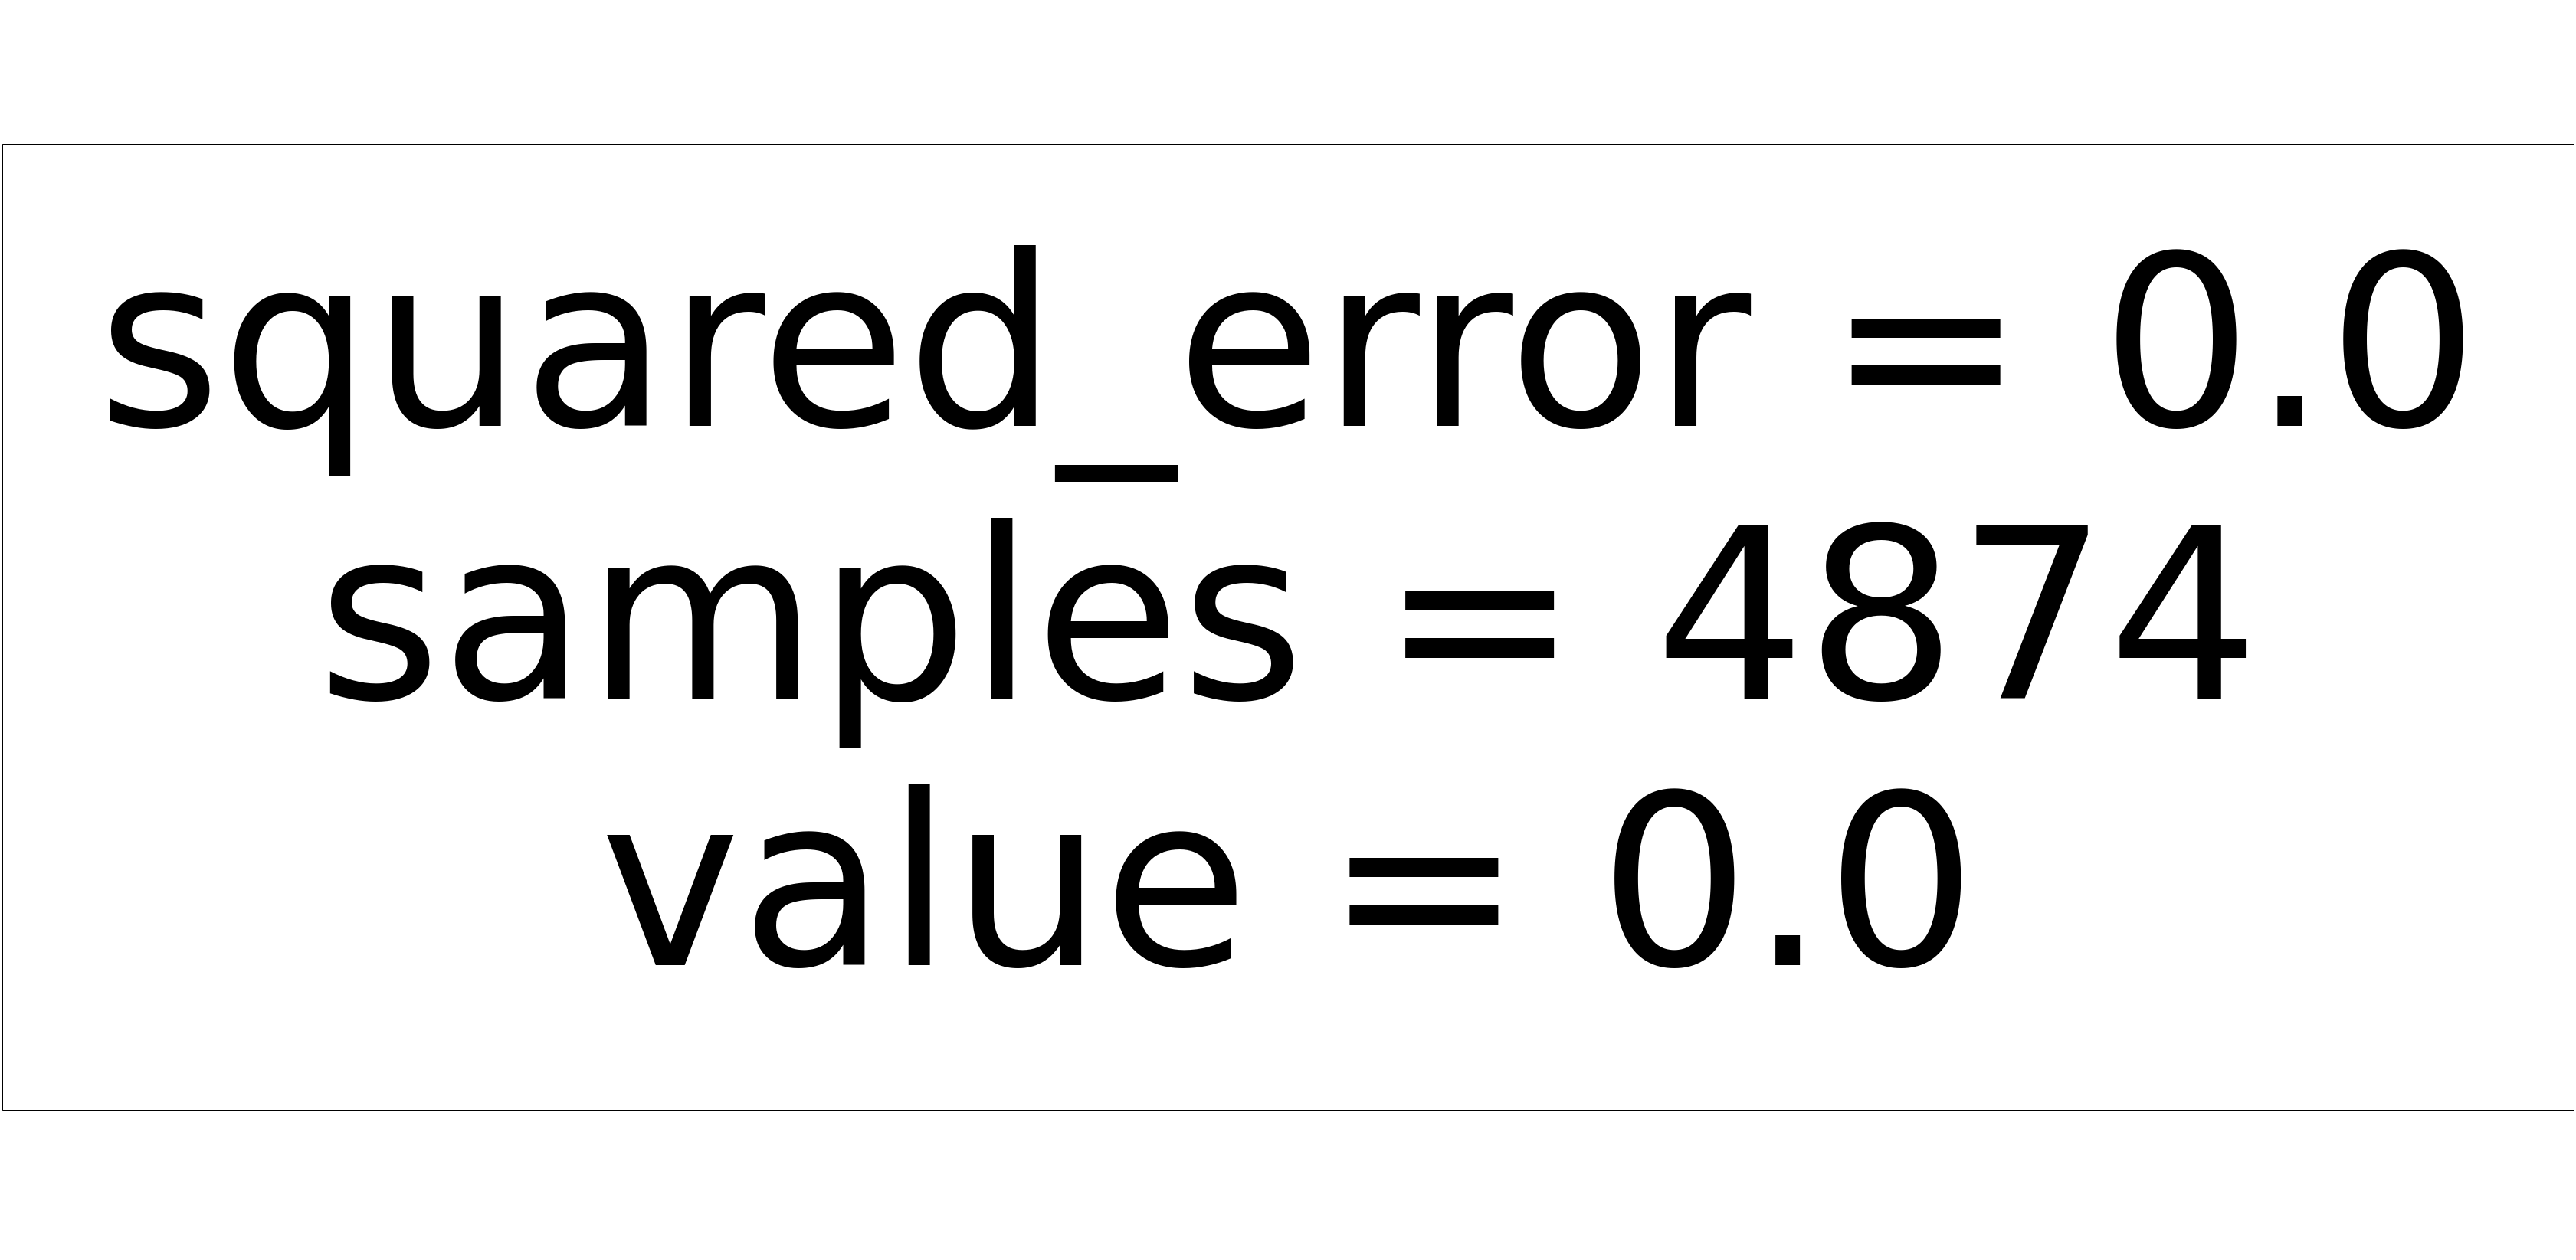

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(60,30))

#tree.plot_tree(model, filled=True, feature_names=list(X.columns))
#plt.show()



import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Crea el gráfico como lo harías normalmente
plt.figure(figsize=(60,30))
tree.plot_tree(model, filled=True, feature_names=list(X.columns))

# Crea un objeto PdfPages
pdf = PdfPages("nombre_del_archivo.pdf")

# Guarda el gráfico en el archivo PDF
pdf.savefig()

# Cierra el archivo PDF
pdf.close()

In [ ]:
X.columns.shape

print(tree.export_text(model))
rules=tree.export_text(model)

def iterate_rules(rules, X):
    for i in range(len(X.columns)):
      rules = rules.replace("feature_"+str(i), X.columns[i])
    return rules

rules = iterate_rules(rules, X)

# Imprimimos las reglas actualizadas
print(rules)

|--- value: [0.00]

|--- value: [0.00]



# 6 Describe cómo usarías tecnología o herramientas o código para conectar ese contenido a los productos de TalentPitch.
Como mencionaba el correo, el objutivo es apalancar el core de talentpitch

*Nuestro Core es el Match entre esos Talentos y las organizaciones. Hoy en día no tenemos los suficientes Talentos, o Empresas o vacantes en la plataforma y necesitamos traer muchos más para poder facilitar las exhibiciones y ese Match* 

## 1. Automatización de obtención de ofertas y postulaciones

El objetivo es incrementar la base de 
esto puede ser una forma eficiente de mejorar el proceso de selección y ahorrar tiempo y esfuerzo

* Utilizar herramientas de web scraping o web crawling para extraer la información de las ofertas laborales y los correos electrónicos de recursos humanos de las empresas que las publican. (Mejorar y terminar los análisis propuestos en este notebook)

* Crear algoritmo de match y priorización de candidatos (expectativas salariales vs oferta, coincidencia entre Requerimientos y habilidades) utilizando técnicas de aprendizaje automático, estadísticas (propensity score matching) o algoritmos de filtrado y búsqueda.

* Opción 1: Enviar los perfiles de talentpitch de los candidatos priorizados al correo de recursos humanos de la empresa (previo solicitud de permiso del usuario). Se pueden utilizar librerias como Nodemailer
* Opción 2: Que el candidatos envié la propuesta diseñando el mensaje de la postulación y enviando el correo
 * que solo deba dar enviar
 * Puede ser notificado por el app o por WhatsApp


## 2. TRM
Crear un TRM (talent relationship manager) donde se monitore el "funel", desde que el usuario ingresa a la plataforma hasta que consiga empleo, buscando que todos lleguen al "cierre" (obtener un empleo). 

El objetivo es que con los datos de las cohortes se pueda determinar no solo la efectividad del proceso, sino la adherencia de los trabajadores y contribuir a que no cambien de empresa. Avisando a la empresa de tendencias de las ofertas para el perfil de sus trabajadores (salarios, beneficios) para que tengan elementos para mantener el talento, o atraer nuevo talento que talvez sea mejor que el que tienen.

## 3. Crear audiencia

El principal inconveniente para las empresas es que los canales de comunicación con sus usuarios son el vehículo de monetización de las redes sociales, lo que se traduce en altos costos adquisición de clientes (CAC por sus siglas en inglés)

Por lo cual, se propone utilizar mecanismos que permitar crecer la base de datos de usuarios a partir del darles valor. 

Una manera puede ser utilizar a los talentos que ya obtuvieron trabajo por medio de talentpitch para que sean los nodos iniciadores de campañas con ofertas dirigidas. Es decir, enviar por un chat de WhatsApp una lista de ofertas del sector de trabajo del talento invitando a que sean compartidas con sus conocidos. 

Así no se incita a que cambie de trabajo, pero si a que lo comparta por WhatsApp


### Ejemplo de campaña

¡Hola! ¿Qué tal? Espero que estés bien. ¡Sé que has estado buscando trabajo en el sector de callcenter y quería compartir contigo esta oportunidad! 🤝

He visto que TalentPitch tiene una lista de 5 trabajos disponibles en el sector de callcenter 💼📱 y me parece que podrías ser un candidato perfecto para ellos. Si estás interesado, ¡no dudes en aplicar! 🚀

Aquí te dejo un resumen de las ofertas disponibles:

📌 Operador de callcenter: se requiere experiencia previa en atención al cliente y buenas habilidades de comunicación. https://www.talentpitch.co/challenges/112867

📌 Asesor financiero: se busca a alguien con conocimientos en finanzas y una actitud proactiva. https://www.talentpitch.co/challenges/112867

📌Ejecutivo de ventas: se busca a alguien con experiencia en ventas y habilidades de persuasión. https://www.talentpitch.co/challenges/112867

📌 Asesor de servicio al cliente: se requiere una persona con excelentes habilidades de atención al cliente y buena resolución de problemas. https://www.talentpitch.co/challenges/112867

📌 Líder de equipo: se busca a una persona con experiencia en liderazgo y gestión de equipos para liderar a un equipo de operadores de callcenter. https://www.talentpitch.co/challenges/112867


¡No te quedes con las ganas! 💪 Si estás interesado, ¡no dudes en aplicar a través de TalentPitch! 🚀 ¡Te deseo mucho éxito en tu búsqueda de empleo! 🤞

**No es una estafa, #YoSoyTalentPitch**
** No olvides compartir, siempre hay trabajo, siempre hay un mejor trabajo**


Habría que realizar las pruebas A/B y comparar el CAC, el potencial está en que el mensaje sea reenviado, lo que reduciría los costos y tendría la prueba social.

### 4. Tú siguiente paso profesional

Estamos en una era en la que las personas no ejercen la carrera que estudiamos y queremos cambiar de carrera, que tal si apoyamos a las personas en esa mutación laboral reduciendo el temor de tomar una "mala" decisión entregando los datos de las rutas profesionales que maximizan mis ingresos y reducen la cantidad de conocimientos a adquirir?

Esto puede hacerse con árboles de decisión que analicen cohortes de talentos de una la misma profesión hayan tenido cambios de carrera é inferir cuales han tenido mayores réditos.

Esto se podría acompañar con una membresia premium para dar las sugerencias del cambio de carrera y con el contenido educativo. buscando replicar el modelo de [Henry](https://www.soyhenry.com/AIC)


